# Lux AI Season 2 Tutorial - Python Kit

Welcome to Lux AI Season 2!

This notebook is the basic setup to use Jupyter Notebooks and the kaggle-environments package to develop your bot. If you plan to not use Jupyter Notebooks or any other programming language, please see our Github. The following are some important links!

Competition Page: https://www.kaggle.com/c/lux-ai-season-2/

Online Visualizer: https://s2vis.lux-ai.org/

Specifications: https://www.lux-ai.org/specs-s2

Github: https://github.com/Lux-AI-Challenge/Lux-Design-S2

Bot API: https://github.com/Lux-AI-Challenge/Lux-Design-S2/tree/main/kits

And if you haven't done so already, we highly recommend you join our Discord server at https://discord.gg/aWJt3UAcgn or at the minimum follow the kaggle forums at https://www.kaggle.com/c/lux-ai-season-2/discussion. We post important announcements there such as changes to rules, events, and opportunities from our sponsors!

Now let's get started!

## Prerequisites
We assume that you have a basic knowledge of Python and programming. It's okay if you don't know the game specifications yet! Feel free to always refer back to https://www.lux-ai.org/specs-s2.

## Basic Setup
First thing to verify is that you have python 3.7 or above and have the [luxai_s2](https://pypi.org/project/luxai_s2/) package installed

In [1]:
# verify version
# !python --version
# !pip install --upgrade luxai_s2
# !pip install importlib-metadata==4.13.0
# !pip install --upgrade moviepy 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np
from adl.debugger import Debugger
from agent import Agent
from lux.kit import obs_to_game_state, GameState, EnvConfig
from luxai_s2.utils import animate
from lux.utils import direction_to, my_turn_to_place_factory
from adl.kit import animate, interact

We can now create an environment and start interacting with it, as well as look at what the observation is like

In [4]:
env = LuxAI_S2() # create the environment object
obs = env.reset(seed=41) # resets an environment with a seed

In [5]:
# the observation is always composed of observations for both players.
obs.keys(), obs["player_0"].keys()

(dict_keys(['player_0', 'player_1']),
 dict_keys(['units', 'teams', 'factories', 'board', 'real_env_steps', 'global_id']))

To visualize the environment, on jupyter notebooks you have two options

With the `rgb_array` mode you can visualize every step as an environment episode progresses. 

With the CLI tool, you can run an episode and save a replay.json to upload to https://s2vis.lux-ai.org/ or a replay.html file to directly open and watch

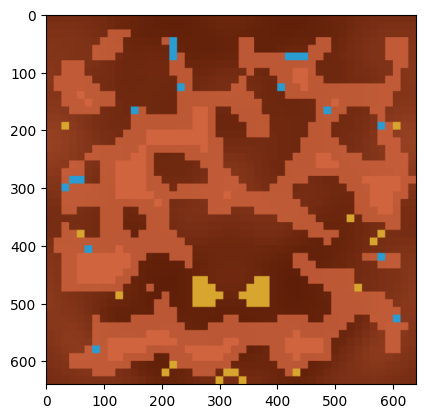

In [6]:
# visualize the environment so far with rgb_array to get a quick look at the map
# dark orange - high rubble, light orange - low rubble
# blue = ice, yellow = ore
img = env.render("rgb_array", width=640, height=640)
plt.imshow(img)

Each team gets `N` factories to place, with. For conveniency the observation contains all possible spawn locations for your team

#### Building Robots

Only factories can build robots, so for each factory on our team, if there is enough metal and power, we will issue a command to build a new heavy robot.

More advanced strategies will be able to efficiently leverage light units as well to collect resources but for simplicity, this tutorial uses heavy robots since they don't need to move as often to collect many resources (albeit very energy inefficient).

In [7]:
from lux.kit import obs_to_game_state, GameState
import logging
logging.basicConfig(level=logging.INFO)

In [8]:
# recreate our agents and run
agents = {player: Agent(player, env.state.env_cfg) for player in env.agents}
animation, obs = interact(env, agents, 30)
animation

early setup player_0 at step 0
early setup player_1 at step 0
early setup player_0 at step 1
early setup player_1 at step 1
early setup player_0 at step 2
early setup player_1 at step 2
early setup player_0 at step 3
early setup player_1 at step 3
early setup player_0 at step 4
early setup player_1 at step 4


In [9]:
debugger = Debugger()
debugger.printAgentStates(agents['player_0'], 0, obs['player_0'])
debugger.printOpponentStates(agents['player_0'], 0, obs['player_0'])

faction: AlphaStrike
	team_id: 0
	agent: player_0
	water: 0
	metal: 0
	factories_to_place: 0
	factory_strains: [0, 2]
#factories: 1
	unit_id: factory_0
	strain_id: 0
	power: 750
	cargo: UnitCargo(ice=0, ore=0, water=295, metal=0)
	pos: [18  4]
#units: 1
	unit_id: unit_8
	unit_type: HEAVY
	power: 50
	cargo: UnitCargo(ice=40, ore=0, water=0, metal=0)
	pos: [18  4]
	unit_cfg: UnitConfig(METAL_COST=100, POWER_COST=500, CARGO_SPACE=1000, BATTERY_CAPACITY=3000, CHARGE=10, INIT_POWER=500, MOVE_COST=20, RUBBLE_MOVEMENT_COST=1, DIG_COST=60, DIG_RUBBLE_REMOVED=20, DIG_RESOURCE_GAIN=20, DIG_LICHEN_REMOVED=100, SELF_DESTRUCT_COST=100, RUBBLE_AFTER_DESTRUCTION=10, ACTION_QUEUE_POWER_COST=10)
	action_queue: []
faction: AlphaStrike
	team_id: 1
	agent: player_1
	water: 0
	metal: 0
	factories_to_place: 0
	factory_strains: [1, 3]
#factories: 1
	unit_id: factory_1
	strain_id: 1
	power: 750
	cargo: UnitCargo(ice=0, ore=0, water=275, metal=0)
	pos: [14 40]
#units: 1
	unit_id: unit_9
	unit_type: HEAVY
	powe

## Create a submission
Now we need to create a .tar.gz file with main.py (and agent.py) at the top level. We can then upload this!

In [10]:
!tar -czf submission.tar.gz *

## Submit
Now open the /kaggle/working folder and find submission.tar.gz, download that file, navigate to the "MySubmissions" tab in https://www.kaggle.com/c/lux-ai-season-2/ and upload your submission! It should play a validation match against itself and once it succeeds it will be automatically matched against other players' submissions. Newer submissions will be prioritized for games over older ones. Your team is limited in the number of succesful submissions per day so we highly recommend testing your bot locally before submitting.

## CLI Tool

To test your agent without using the python API you can also run

In [11]:
!luxai-s2 main.py main.py -v 2 -s 101 -o replay.html

760: player_0 lost all factories
1.681617259979248


which uses a random seed and generates a replay.html file that you can click and watch. Optionally if you specify `-o replay.json` you can upload replay.json to http://s2vis.lux-ai.org/.

The CLI tool enables you to easily run episodes between any two agents (python or not) and provides a flexible tournament running tool to evaluate many agents together. Documentation on this tool can be found here: https://github.com/Lux-AI-Challenge/Lux-Design-S2/tree/main/luxai_runner/README.md

In [12]:
import IPython
IPython.display.HTML(filename='replay.html')